Load data

In [2]:
from acf_core import set_mpl, np, plt, path2plots, savepath
%matplotlib inline
acfs = {}

LH_file = np.load(savepath+'/LH_xi.npz')
LH_noz_file = np.load(savepath+'/LH_noz_xi.npz')

eFEDS_file = np.load(savepath+'/eFEDS_xi.npz')
eFEDS_noz_file = np.load(savepath+'/eFEDS_noz_xi.npz')

acfs['LH'] = {'r': LH_file['r'],'xi': LH_file['xi'], 'cov': LH_file['cov'], 'ccl_res': LH_file['ccl_res']}


acfs['LH_noz'] = {'r': LH_noz_file['r'],'xi': LH_noz_file['xi'], 'cov': LH_noz_file['cov'], 'ccl_res': LH_noz_file['ccl_res']}

acfs['eFEDS'] = {'r': eFEDS_file['r'],'xi': eFEDS_file['xi'], 'cov': eFEDS_file['cov'], 'ccl_res': eFEDS_file['ccl_res']}

acfs['eFEDS_noz'] = {'r': eFEDS_noz_file['r'],'xi': eFEDS_noz_file['xi'], 'cov': eFEDS_noz_file['cov'], 'ccl_res': eFEDS_noz_file['ccl_res']}

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


set palette to husl
set matplotlib rc
LH, 4.99 full cov
LH, 5.85 diag cov
===
eFEDS, 7.08 full cov
eFEDS, 7.07 diag cov
===
LH_noz, 5.85 full cov
LH_noz, 5.49 diag cov
===
eFEDS_noz, 6.84 full cov
eFEDS_noz, 6.22 diag cov
===


findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


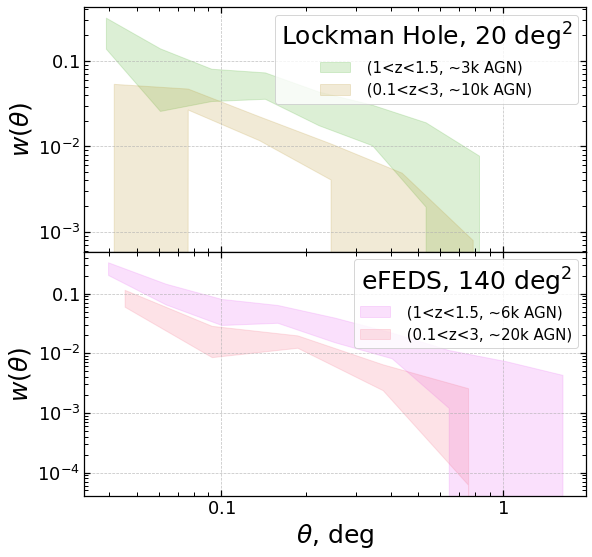

In [3]:
#fig,  ax =  plt.subplots(2, figsize = (9,9))

fig = plt.figure(figsize=(9, 9))
plt.subplots_adjust(hspace=0)
plt.subplots_adjust(wspace=0)
rows, cols =  2,  1
# (rows,cols), (y,x) <- those are coordinates of an axis in subplots
ax1 = plt.subplot2grid((rows, cols), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((rows, cols), (1, 0), rowspan=1, colspan=1, sharex = ax1)


set_mpl('husl')



for key, name, color, ax in zip(['LH', 'eFEDS', 'LH_noz', 'eFEDS_noz'],['LH: (1<z<1.5, ~3k AGN)', 'eFEDS: (1<z<1.5, ~6k AGN)', 'LH: (0.1<z<3, ~10k AGN)', 'eFEDS: (0.1<z<3, ~20k AGN)'], ['C2', 'C5', 'C7', 'C12'], [ax1,ax2,ax1,ax2]):
    r = acfs[key]['r']
    xi = acfs[key]['xi']
    cov = acfs[key]['cov']
    ccl_res = acfs[key]['ccl_res']
    err = np.sqrt(np.diag(cov))
    #ax.plot(r, xi, '.' , color = color)
    ax.fill_between(r, xi-err, xi+err, color = color, alpha = 0.2, label = name.split(':')[-1])
    #ax.errorbar(r, xi, err, color = color, alpha = 0.4)
    #ax.plot(r, ccl_res, '-', color = color)
    icov = np.linalg.pinv(cov)
    snr = np.sqrt(np.einsum('i,ji, j->', xi, icov, xi))
    snr_naive = np.sqrt(np.sum(xi**2/np.diag(cov)))
    
    print(f"{key}, {snr:.2f} full cov")
    print(f"{key}, {snr_naive:.2f} diag cov")
    print('===')

#inv
# LH (1<z<1.5), 4.99
# eFEDS (1<z<1.5), 7.76
# LH (0.1<z<3), 5.85
# eFEDS (0.1<z<3), 6.84
    

for ax, title in zip([ax1,ax2], ['Lockman Hole, 20 deg$^2$', 'eFEDS, 140 deg$^2$']):
    #ax.legend( ['1<z<1.5', '0.1<z<3'], title = title,)
    ax.legend(title = title,)
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_yscale('symlog', linthresh=2e-3)
    ax.set_xlabel(r'$\theta$, deg')
    ax.set_ylabel(r'$w(\theta)$')

plt.savefig(path2plots+'small_scale_clustering.pdf')
